In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import estraces
from tqdm import tqdm


In [ ]:
path = "./traces/RSA_SaM_traces.ets"
ths = estraces.read_ths_from_ets_file(path)

In [31]:
ths[0]

Trace:
Reader instance..: ETS format reader of file ./traces/RSA_SaM_traces.ets with 100 traces.
Index in set.....: 0
Samples size.....: 250000
exponent.........: [122 197 229  53  98  17 129 198 170  66   2 190 118  66   4  66 100  47
  66 206 206 248 196  66  87 142  90 189   2  20  85  31 119 201 150 159
 159 217 240 100  20 222  70  91  26 165  27 149  70 114 174 233 188   8
  38  59 144  69  63 236 114 170 106 107  98 171 160   3 192  56 215 199
 142  80 229 180  54  93  55  13 112 162 162  11 140 213 225 238 216  50
 231 207 166 250 123  86 112 206  14 220  68  11 248 246  80  53  74 240
  33 105  35 239 226 218 201 153 183  25 183  94 139  82 235  28 246  76
 205  91]
plaintext........: [ 70 182 164  54 181 100 186 187 168  69   4  86  39 153 216 101  48 147
  29   3   7   9 112  45  47 189  36 235  38 174 120  12 229 171 141  30
  23  13 208  54 251  31  21   5 167 125 194  30 238  26  42 190  29  50
  32 218  58 199 252   5  30 164  91  78 145 190 182 220  90  90  64 177
 158 

In [10]:
trace = ths[0].samples
exp = ths[0].exponent

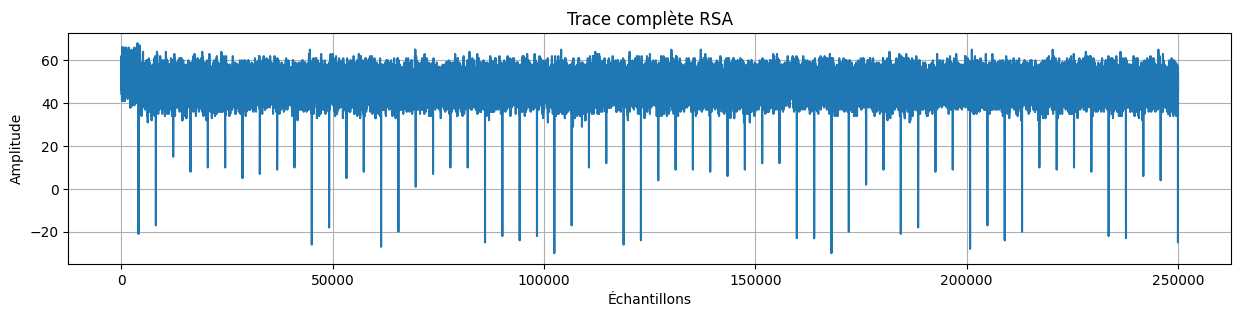

In [12]:
plt.figure(figsize=(15, 3))
plt.plot(trace[:])
plt.title("Trace complète RSA")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

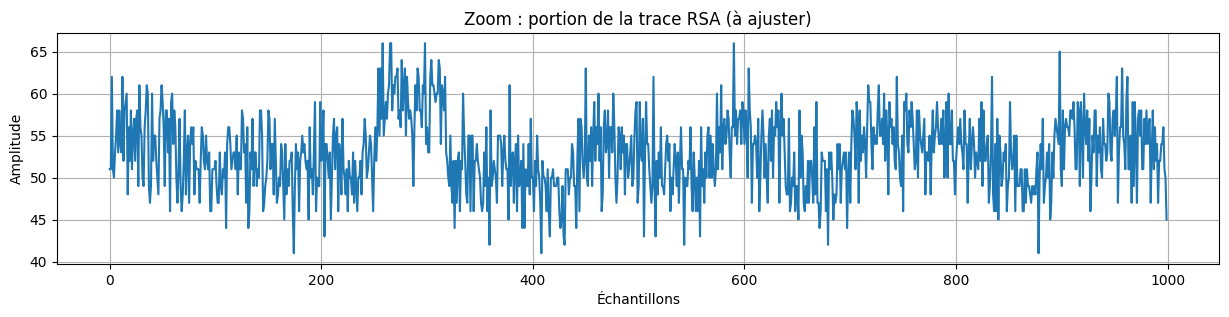

In [ ]:
plt.figure(figsize=(15, 3))
plt.plot(trace[50000:60000])
plt.title("Zoom : portion de la trace RSA (à ajuster)")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


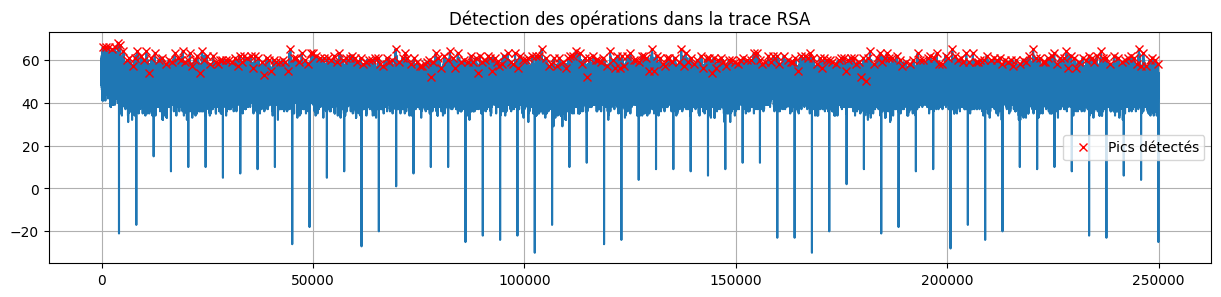

In [29]:

peaks, _ = find_peaks(trace, distance=500, height=0.05)  

plt.figure(figsize=(15, 3))
plt.plot(trace[:])
plt.plot(peaks, trace[peaks], "rx", label="Pics détectés")
plt.title("Détection des opérations dans la trace RSA")
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
bit_values = []

for i in range(len(peaks)):
    start = max(0, peaks[i] - 100)
    end = min(len(trace), peaks[i] + 100)
    window = trace[start:end]

    energy = np.sum(np.abs(window))  
    bit = 1 if energy > 15 else 0   
    bit_values.append(bit)

print("Bits estimés de l'exposant d :", ''.join(str(b) for b in bit_values))


Bits estimés de l’exposant d : 111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111


In [20]:
real_d_bin = ''.join([bin(b)[2:].zfill(8) for b in exp]) 
real_bits = real_d_bin[:len(bit_values)]

for i, (pred, real) in enumerate(zip(bit_values, real_bits)):
    print(f"Bit {i:02}: estimé={pred}, réel={real}")


Bit 00: estimé=1, réel=0
Bit 01: estimé=1, réel=1
Bit 02: estimé=1, réel=1
Bit 03: estimé=1, réel=1
Bit 04: estimé=1, réel=1
Bit 05: estimé=1, réel=0
Bit 06: estimé=1, réel=1
Bit 07: estimé=1, réel=0
Bit 08: estimé=1, réel=1
Bit 09: estimé=1, réel=1
Bit 10: estimé=1, réel=0
Bit 11: estimé=1, réel=0
Bit 12: estimé=1, réel=0
Bit 13: estimé=1, réel=1
Bit 14: estimé=1, réel=0
Bit 15: estimé=1, réel=1
Bit 16: estimé=1, réel=1
Bit 17: estimé=1, réel=1


🔍 Comparaison bit à bit :
Bit 000: estimé=1, réel=0
Bit 001: estimé=1, réel=1
Bit 002: estimé=1, réel=1
Bit 003: estimé=1, réel=1
Bit 004: estimé=1, réel=1
Bit 005: estimé=1, réel=0
Bit 006: estimé=1, réel=1
Bit 007: estimé=1, réel=0
Bit 008: estimé=1, réel=1
Bit 009: estimé=1, réel=1
Bit 010: estimé=1, réel=0
Bit 011: estimé=1, réel=0
Bit 012: estimé=1, réel=0
Bit 013: estimé=1, réel=1
Bit 014: estimé=1, réel=0
Bit 015: estimé=1, réel=1
Bit 016: estimé=1, réel=1
Bit 017: estimé=1, réel=1
Bit 018: estimé=1, réel=1
Bit 019: estimé=1, réel=0
Bit 020: estimé=1, réel=0
Bit 021: estimé=1, réel=1
Bit 022: estimé=1, réel=0
Bit 023: estimé=1, réel=1
Bit 024: estimé=1, réel=0
Bit 025: estimé=1, réel=0
Bit 026: estimé=1, réel=1
Bit 027: estimé=1, réel=1
Bit 028: estimé=1, réel=0
Bit 029: estimé=1, réel=1
Bit 030: estimé=1, réel=0
Bit 031: estimé=1, réel=1
Bit 032: estimé=1, réel=0
Bit 033: estimé=1, réel=1
Bit 034: estimé=1, réel=1
Bit 035: estimé=1, réel=0
Bit 036: estimé=1, réel=0
Bit 037: est

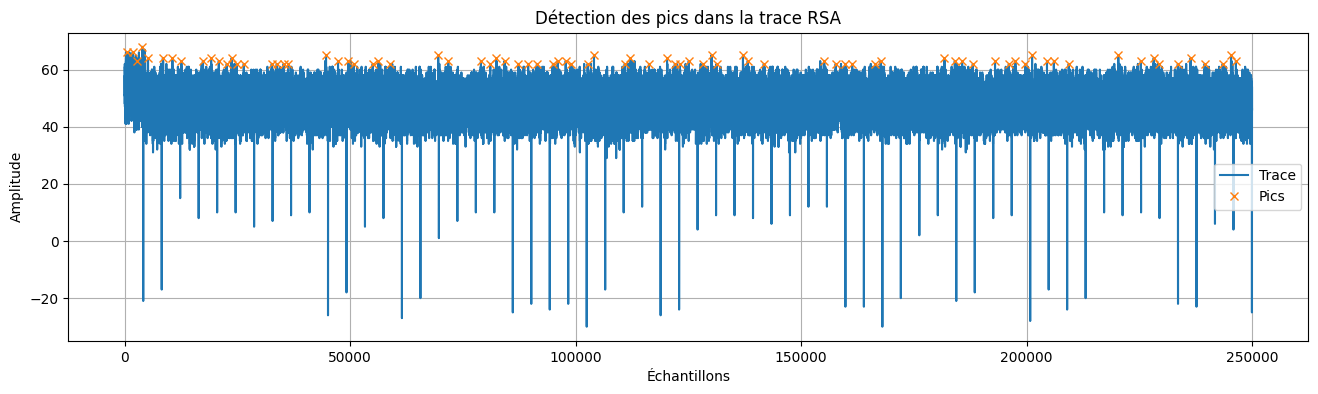

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import estraces

# Charger les traces
path = "../SideSCA-Traces-Public/RSA_SaM_traces.ets"
ths = estraces.read_ths_from_ets_file(path)

trace = ths[0].samples
true_exponent = ths[0].exponent  # La vraie clé binaire
nb_bits_to_guess = len(true_exponent)

# Paramètres pour détecter les pics
distance_minimale = 1000
hauteur_minimale = np.mean(trace) + 3 * np.std(trace)

# Étape 1 : détection des pics dans toute la trace
peaks, _ = find_peaks(trace, height=hauteur_minimale, distance=distance_minimale)

# Étape 2 : détection des bits par analyse locale
estimated_bits = []

window_size = 2000  # fenêtre d’analyse autour de chaque pic

for i in range(len(peaks) - 1):
    start = peaks[i]
    end = peaks[i + 1]

    segment = trace[start:end]

    # Rechercher des sous-pics dans cette zone
    subpeaks, _ = find_peaks(segment, height=np.mean(segment) + 2 * np.std(segment), distance=100)

    if len(subpeaks) >= 2:
        estimated_bits.append(1)  # Deux pics ≈ Square + Multiply
    else:
        estimated_bits.append(0)  # Un seul pic ≈ Square

# Convertir l'exposant réel en bits
# Chaque entier dans `ths[0].exponent` est un octet -> on les transforme en bits
true_exponent = ths[0].exponent
true_exponent_bits = []

for byte in true_exponent:
    bits = list(map(int, format(byte, '08b')))  # 8 bits par octet
    true_exponent_bits.extend(bits)

# Tronquer ou étendre l’estimation au même nombre de bits
estimated_bits = estimated_bits[:len(true_exponent_bits)]

# Comparaison bit à bit
print("🔍 Comparaison bit à bit :")
correct = 0
for i, (e, t) in enumerate(zip(estimated_bits, true_exponent_bits)):
    if e == t:
        correct += 1
    print(f"Bit {i:03d}: estimé={e}, réel={t}")

# Taux de succès
print(f"\n🎯 Taux de succès : {100 * correct / len(estimated_bits):.2f}%")


# Optionnel : visualisation
plt.figure(figsize=(16, 4))
plt.plot(trace[:], label="Trace")
plt.plot(peaks, trace[peaks], "x", label="Pics")
plt.title("Détection des pics dans la trace RSA")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.legend()
plt.grid(True)
plt.show()
